<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#朴素贝叶斯-Naive-Bayes" data-toc-modified-id="朴素贝叶斯-Naive-Bayes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>朴素贝叶斯 Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#模型原理：" data-toc-modified-id="模型原理：-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>模型原理：</a></span></li><li><span><a href="#模型假设" data-toc-modified-id="模型假设-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>模型假设</a></span></li><li><span><a href="#过程" data-toc-modified-id="过程-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>过程</a></span><ul class="toc-item"><li><span><a href="#先验概率和条件概率的估计求法(极大似然估计)" data-toc-modified-id="先验概率和条件概率的估计求法(极大似然估计)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>先验概率和条件概率的估计求法(极大似然估计)</a></span></li></ul></li><li><span><a href="#期望风险最小化-==-后验概率最大化(0-1损失函数)" data-toc-modified-id="期望风险最小化-==-后验概率最大化(0-1损失函数)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>期望风险最小化 == 后验概率最大化(0-1损失函数)</a></span></li><li><span><a href="#贝叶斯估计-(拉普拉斯平滑)" data-toc-modified-id="贝叶斯估计-(拉普拉斯平滑)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>贝叶斯估计 (拉普拉斯平滑)</a></span></li></ul></li><li><span><a href="#Sklearn中的实现" data-toc-modified-id="Sklearn中的实现-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sklearn中的实现</a></span><ul class="toc-item"><li><span><a href="#Gaussian-Naive-Bayes" data-toc-modified-id="Gaussian-Naive-Bayes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gaussian Naive Bayes</a></span></li><li><span><a href="#多项式朴素贝叶斯分类器-multinomial-Naive-Bayes" data-toc-modified-id="多项式朴素贝叶斯分类器-multinomial-Naive-Bayes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>多项式朴素贝叶斯分类器 multinomial Naive Bayes</a></span></li><li><span><a href="#BernouliNB-伯努利贝叶斯分类器" data-toc-modified-id="BernouliNB-伯努利贝叶斯分类器-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>BernouliNB 伯努利贝叶斯分类器</a></span></li><li><span><a href="#递增式学习partial_fit方法" data-toc-modified-id="递增式学习partial_fit方法-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>递增式学习partial_fit方法</a></span></li></ul></li></ul></div>



# 朴素贝叶斯 Naive Bayes

生成模型: 直接学习 $P(X,Y)$,再计算条件概率 $P(Y|X)$

## 模型原理：
基于样本，得出先验概率 $P(Y=C_k)$与条件概率$P(X|Y)$
计算后验概率:
$$P(Y=c_k|X) = \frac{P(X|y=C_k)P(y=c_k)}{\sum_{k=1}^n P(X|y=C_k)P(y=c_k)} （*）$$



## 模型假设
由于条件概率分布中有指数级的参数，其估计实际上是不可行的。

因此假设 **条件独立性**，由于X是一个n维向量，即：
$$P(X=x|Y=C_k)=P(X^{(1)}=x^{(1)},\ldots X^{(n)}=x^{(n)}|Y=C_k)\\
= \prod_{j=1}^n P(X^{(j)}=x^{(j)}|Y=C_k) $$

上面这个假设，表示在类别给定(即同类别前提下，用于分类的特征之间是条件独立的)

**目的**：简化计算，使得算法简单，但是可能会牺牲一些分类准确性。


## 过程

输入x，通过统计y的经验分布得到先验概率，再计算各类y在此x下的后验概率，取使得其最大的k作为y的预测类别。

由于分母都相同，由（*）其实是做以下目标
$$arg \underset{C_k}{ max} P(Y=C_k) \prod _j P(X^{(j)}=x^{(j)}|Y=C_k)$$

### 先验概率和条件概率的估计求法(极大似然估计)

(推导可以见自己的笔记本)

![NaiveBayes](img/naiveBayes.jpeg)

$$P(Y=C_k) = \frac{\sum_i^N I(y_i=C_k)}{N}$$

$$P(X^{(j)}=a_{jk}|Y=C_k)=\frac{\sum_i^N I(x_i^{(j)}=a_{jk},y_i=C_k)}{\sum_i^N I(y_i=C_k)}$$

## 期望风险最小化 == 后验概率最大化(0-1损失函数)

由于0-1损失函数$L(C_k, y) = 1,当 y \neq C_k$

若f(x)为决策函数

期望风险$$ R = E(L(Y,f(X)))\\
= E_X \sum L(C_k, f(X))P(C_k|X)
$$


为了使得期望风险最小化，只需要对X=x极小化，由此可得:
$$f(x) = arg \underset{y}{min} \sum_{k=1}^K L(C_k,y)P(C_k|X=x)\\
= arg \underset{y}{min} \sum_{k=1}^K P(y \neq C_k|X=x)\\
= arg \underset{y}{max} \sum_{k=1}^K P(y = C_k|X=x)$$

因此，期望风险最小化 等价于 后验概率最大化

## 贝叶斯估计 (拉普拉斯平滑)
由于难免样本中有些频次为0，为了避免概率值为0，考虑拉普拉斯平滑($\lambda=1 \mbox{时}$)
$$P(Y=C_k) = \frac{\sum_i^N I(y_i=C_k)+\lambda}{N+K\lambda}$$

$$P(X^{(j)}=a_{jk}|Y=C_k)=\frac{\sum_i^N I(x_i^{(j)}=a_{jk},y_i=C_k)+\lambda}{\sum_i^N I(y_i=C_k)+S\lambda}$$

# Sklearn中的实现

## Gaussian Naive Bayes 

高斯朴素贝叶斯假设 似然函数是高斯的，即
$$P(x^{(i)}|y) = \frac{1}{\sqrt{2\pi\sigma_k^2}}exp(-\frac{(X^{(i)}-\mu_k)^2}{2\sigma_k^2})$$

其中的参数使用极大似然估计?
即上述式子是使用 第k个类里面，第i个特征的所有样本的均值，已经标准差

+ sklearn中的类为 GaussianNB,没有参数不需要调参

**属性**:
+ class_prior : 返回一个数组 （n_class, ），每个类别的概率$P(y=C_k)$
+ class_count: 每个类别的样本数量
+ theta_ : （n_class, n_feature）每一个类别上每个特征的均值$\mu_k$
+ sigma_: n_class, n_feature）每一个类别上每个特征的标准差$\sigma_k$

**方法**:
+ fit
+ partial_fit : 对于大数据集，将大数据集切分为多个小数据集，连续调用该方法。
+ predict(X)
+ predict_proba(X),predict_log_proba(X)
+ score()

In [14]:
# 考虑使用sklearn中的digits数据集
from sklearn import datasets, naive_bayes, cross_validation
import numpy as np
import matplotlib.pyplot as plt

In [15]:
digits = datasets.load_digits()
print digits.data[0], '\n', digits.data[0].shape 

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.] 
(64,)


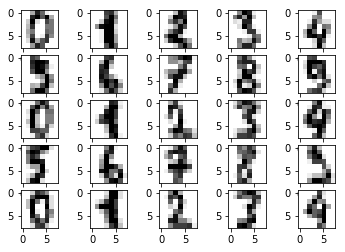

In [16]:
fig = plt.figure()
for i in range(25):
    ax = fig.add_subplot(5,5,i+1)
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    
plt.show()

In [35]:
# 切分数据集digits
X_train,  X_test, y_train,y_test = cross_validation.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

In [36]:
# 使用高斯朴素贝叶斯
model_gaussianNB = naive_bayes.GaussianNB()
model_gaussianNB.fit(X_train, y_train)

# 查看结果
print '先验概率的估计',model_gaussianNB.class_prior_

先验概率的估计 [ 0.10467706  0.10319228  0.09873794  0.10244989  0.10616184  0.09948033
  0.09576837  0.09725316  0.0935412   0.09873794]


In [37]:
print '每个类的样本个数', model_gaussianNB.class_count_

每个类的样本个数 [ 141.  139.  133.  138.  143.  134.  129.  131.  126.  133.]


In [38]:
model_gaussianNB.sigma_.shape

(10, 64)

In [49]:
X_train[y_train == 2,1].mean()

1.0601503759398496

In [48]:
model_gaussianNB.theta_[2,1]
# 这二者相等，说明使用的是均值作为极大似然估计

1.0601503759398496

In [78]:
np.sum(model_gaussianNB.predict(X_train) == y_train)

1155

In [76]:
print '%.2f' % model_gaussianNB.score(X_train,y_train) 

0.86


In [77]:
print '%.2f' % model_gaussianNB.score(X_test,y_test) 

0.83


In [79]:
1155.0 / X_train.shape[0 # 和0.86一样

0.8574610244988864

可以看出朴素贝叶斯实质上是根据样本学习其联合分布和条件分布，在predict的时候计算基于样本的，此x属于某一样本的后验概率最大即判为那一类。

## 多项式朴素贝叶斯分类器 multinomial Naive Bayes
假设特征的条件概率分布满足多项式分布，即
$$P(X^{(j)}=a_{s_j}|y=C_k)=\frac{N_{kj}+\alpha}{N_k+\alpha n}$$

$N_{kj}$表示第k类中j这个特征所有取值数，$N_k$表示属于k的个数

sklearn中的实现

MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

**参数**:
+ alpha: 指定用来平滑的值
+ fit_prior:FALSE表示不学习y的先验分布，使用均匀分布，True学习
+ class_prior: 可以指定先验概率，即不需要再从数据集中学习



In [97]:
model_multiNB = naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True)
model_multiNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
model_multiNB.class_log_prior_

array([-2.25687529, -2.27116124, -2.31528605, -2.27838149, -2.24279055,
       -2.30779538, -2.34582277, -2.33043785, -2.36935327, -2.31528605])

In [99]:
print '%.2f ' % model_multiNB.score(X_train,y_train)

0.91 


In [100]:
print '%.2f ' % model_multiNB.score(X_test,y_test)

0.91 


In [101]:
model_multiNB = naive_bayes.MultinomialNB(alpha=1.0, fit_prior=False)
model_multiNB.fit(X_train, y_train)
print '%.2f ' % model_multiNB.score(X_train,y_train)

0.91 


In [102]:
print '%.2f ' % model_multiNB.score(X_test,y_test)

0.91 


In [103]:
model_multiNB.class_log_prior_

array([-2.30258509, -2.30258509, -2.30258509, -2.30258509, -2.30258509,
       -2.30258509, -2.30258509, -2.30258509, -2.30258509, -2.30258509])

## BernouliNB 伯努利贝叶斯分类器
每一个特征都被假设为一个二元变量,即只取0，1值(可以使得其二元化)

假设特征的条件概率分布满足二项分布
$$P(X^{(j)}|y=C_k)=pX^{(j)}+(1-p)(1-x^{(j)})$$

BernoulliNB(alpha=1.0,binarize=0.0, fit_prior=True, class_prior=None)

+ binarize:若为NOne则认为已经离散化；若为一个浮点值，则大于它的作为1，小于它的作为0

In [113]:
model_BernoulliNB = naive_bayes.BernoulliNB(alpha=1.0, binarize=0)
model_BernoulliNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0, class_prior=None, fit_prior=True)

In [114]:
print '%.2f' % model_BernoulliNB.score(X_train, y_train)

0.87


In [115]:
print '%.2f' % model_BernoulliNB.score(X_test, y_test)

0.85


In [117]:
# 看看不同的离散化值对模型的影响
min_x = min(np.min(X_train.ravel()), np.min(X_test.ravel()))-0.1
max_x = max(np.min(X_train.ravel()), np.max(X_test.ravel()))+0.1

In [119]:
binarizes = np.linspace(min_x, max_x, endpoint=True, num = 100)
train_score=[]
test_score=[]
for item in binarizes:
    model = naive_bayes.BernoulliNB(binarize=item)
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    


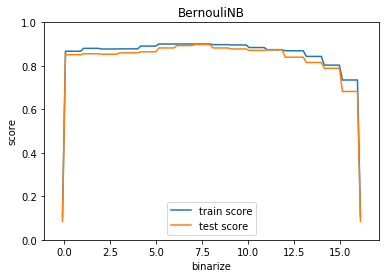

In [120]:
## 绘图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(binarizes, train_score, label = 'train score')
ax.plot(binarizes, test_score, label = 'test score')
ax.set_xlabel('binarize')
ax.set_ylabel('score')
ax.set_ylim(0,1.0)
ax.set_xlim(min_x-1, max_x+1)
ax.set_title('BernouliNB')
ax.legend(loc='best')
plt.show()

## 递增式学习partial_fit方法
大规模的分类问题可能不适合放在内存中进行计算，上述三个分类器都有一个.partial_fit方法，可以动态地增加数据进来使用，进行递增式的学习。

http://scikit-learn.org/stable/modules/naive_bayes.html